In [59]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Basics of Dynamics Systems and Bifurcation Theory
# Workshop \#1, 23 Jan. 2020

#### Navid C. Constantinou, RSES, ANU, 2020

## Dynamical Systems

A dynamical system can be expressed in the form

$$
 \frac{\mathrm{d}}{\mathrm{d}t} \phi(t)= \mathcal{F}\big(\phi(t),\,t;\big). \tag{1}
$$

Above, $\phi(t)$ includes all variables needed to describe the state of the system. (Hereafter, dots above variables denote time-differentiation.)

---

#### Example: the pendulum

For a pendulum that evolves freely in three dimensions, $\phi$ includes the position and the velocity of its free end. In this case, $\phi$ has six components:
$$
  \phi = [x(t), y(t), z(t), \dot{x}(t), \dot{y}(t), \dot{z}(t)].
$$

---

If $\mathcal{F}$ in Eq. (1) *does not* depend explicitly on time $t$ we say that the dynamical system is **autonomous**. Otherwise, the dynamical system is **non-autonomous**.

Given equation (1) and the state of the system at some instance $t=t_0$, e.g., $\phi(t_0)=\phi_0$, we can predict the state of the system $\phi(t)$ for all times $t$. 

## All dynamical systems are of “first order” 


Any $n$-th order differential equation can be rewritten as a system of $n$ differential equations all being **first order**. In that sense, *all* dynamical systems are first-order in time (but of course their dimensionality may vary).


#### Exercise 1

Show that any **non-autonomous** system of $n$ differential equations corresponds to an **autonomous** system of $n+1$ differential equations.

*Hint*: You can start by an example: Show that the forced 1D harmonic oscillator

$$
  \ddot{x} + 2\gamma\dot{x}+\omega^2 x = f_0\cos(2\pi t),
$$

can be rewritten as a system of 3 equations that **do not** depend explicitly on time. Then generalise this to what the exercise wants.

Hint: You may need to change/introduce a new variable.

#### Exercise 2 (optional)

Show that any **nonlinear dynamical system** can be rewritten as a **linear** dynamical system of higher dimensionality.

Take as an example the system:
$$
\dot{x} = -x^2.
$$

How big is the dimension of the equivalent linear system for the example above?

Food for thought: If any nonlinear system can be transformed into a linear one then what's the point of distinguish between *linear* and *nonlinear* dynamical systems?

## Approximating the solution of a Dynamical System 

In most cases finding analytical solutions in closed form for a dynamical system is hard or impossible. That is, we want a method for constructing approximations of the solution for:

\begin{align}
 \dot{\phi}(t) &= \mathcal{F}\big(\phi(t)\,,\, t\big),\tag{2a}\\
 \phi(t_0) & =\phi_0. \tag{2b}
\end{align}

How do we proceed?

Let $\phi(t)$ the solution of Eqs. (2) we want to approximate. Now use a Taylor-series expansion about $t=t_0$:

\begin{align}
  \phi(t) &= \phi(t_0) + (t-t_0)\dot{\phi}\big|_{t=t_0} + \tfrac1{2!}(t-t_0)^2\ddot{\phi}\big|_{t=t_0} + \dots \\
          &= \phi(t_0) + (t-t_0) \mathcal{F}(\phi_0,t_0) + \tfrac1{2!}(t-t_0)^2 \frac{\mathrm{d}\mathcal{F}}{\mathrm{d}t}\big|_{t=t_0} + \dots \tag{3}\\
\end{align}

If $t$ is close to $t_0$ then we can neglect terms of order $(t-t_0)^2$ and higher. This gives the so-called Euler approximation.

## Forward Euler Time-Stepping Scheme 

Assume a time-discretization with time-step $\delta$, i.e.,

$$
 t_n = t_0 + n\,\delta,\ n=0,1,\dots. \tag{4}
$$

Let's denote the values of the approximations of $\phi(t)$ at times above as $\phi_n \equiv \phi(t_0+n\delta)$. The Forward Euler approximation is then

$$
  \phi_{n+1} = \phi_n + \delta\,\mathcal{F}\big(\phi_n, t_n\big). \tag{5}
$$


In [97]:
import numpy as np
from numpy import exp, sin, cos, pi
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import gridspec

from matplotlib import rc
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size':20})
# rc('text', usetex=True)
rc('xtick', labelsize=16) 
rc('ytick', labelsize=16) 
rc('axes', labelsize=20)    # fontsize of the x and y labels



## Example 

Let's try to integrate

\begin{align}
 \dot{x} &= -x + \sin t, \\
 x(0) &= x_0.
\end{align}

In this case we could actually solve the system: $x(t) = e^{-t}\,x_0 + \frac1{2}(e^{-t} + \sin t - \cos t)$

**IMPORTANT**: Always start with an example that you know what to expect!

## **CAN'T STRESS THIS ENOUGH**

#### **Always** start with an example that you know what to expect!

## So, let's code this up

\begin{align}
 \dot{x} &= -x + \sin t, \\
 x(0) &= x_0.
\end{align}



In [98]:
def RHS(x, t):
    xdot = -x + sin(t)
    return xdot

def Euler(xn, tn, dt):
    xnext = xn + dt*RHS(xn, tn)
    return xnext

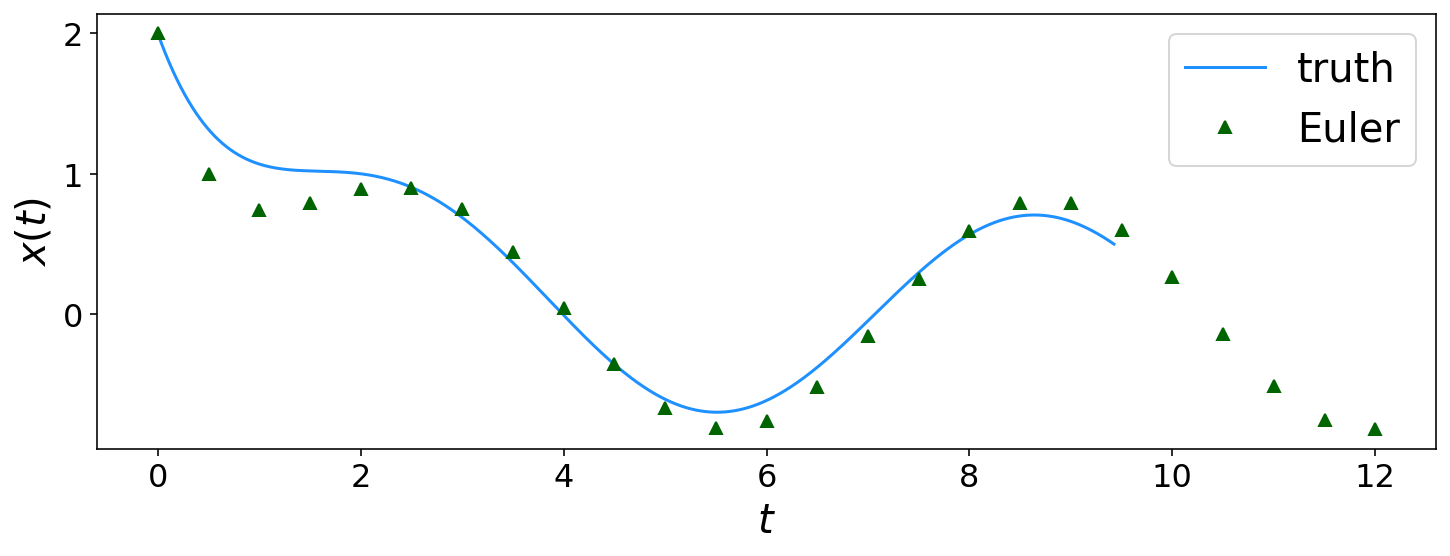

In [99]:
x0 = 2.0   # initial position

t_an = np.linspace(0, tfin, 1000) # a very dense time array
x_an = x0*exp(-t_an) + 0.5*(exp(-t_an) + sin(t_an) - cos(t_an))

tfin, nsteps = 12.0, 25  # final time, number of time-steps
t = np.linspace(0, tfin, nsteps)
dt = t[1]-t[0]

x_euler = 0*t; x_euler[0] = x0 #initialize array and set initial condition

for j in np.arange(0, nsteps-1):
    xn, tn = x_euler[j], t[j] 
    x_euler[j+1] = Euler(xn, tn, dt)

plt.figure(figsize=(12, 4))
plt.plot(t_an, x_an, label="truth", color="dodgerblue")
plt.plot(t, x_euler, '^', label="Euler", color="darkgreen")
plt.legend(fontsize=20); plt.xlabel(r"$t$"); plt.ylabel(r"$x(t)$");

## Error associated with Forward Euler 

In Forward-Euler timestepping scheme we ignore all terms of $\mathcal{O}(\delta^2)$.

@ every time-step $\longrightarrow$ error $\sim \delta^2$

$\dfrac{t_{\rm final}}{\delta}$ time-steps $\longrightarrow$ total error $\sim \dfrac{t_{\rm final}}{\delta} \delta^2 \sim \delta$


#### Good.. But we can do better!

## Runge-Kutta 4th order scheme

The Runge-Kutta 4th order time-stepping scheme is:
$$
  \phi_{n+1} = \phi_n + \dfrac{\delta}{6}\big(k_1 + 2k_2 + 2k_3 + k4\big), \tag{5}
$$
where
\begin{align}
  k_1 & = \mathcal{F}\big(\phi_n\,,\, t_n\big), \\
  k_2 & = \mathcal{F}\big(\phi_n + \tfrac1{2} k_1 \delta \,,\, t_n + \tfrac1{2}\delta\big), \\
  k_3 & = \mathcal{F}\big(\phi_n + \tfrac1{2} k_2 \delta \,,\, t_n + \tfrac1{2}\delta\big), \\
  k_4 & = \mathcal{F}\big(\phi_n + k_3 \delta \,,\, t_n + \delta\big). \\
\end{align}

RK4 @ every time-step $\longrightarrow$ error $\sim \delta^5$

total error $\longrightarrow$ $\mathcal{O}(\delta^4)$

## Let's code this up as well

In [100]:
def RK4(xn, tn, dt):
    k1 = RHS(xn, tn)
    k2 = RHS(xn+k1*dt/2, tn+dt/2)
    k3 = RHS(xn+k2*dt/2, tn+dt/2)
    k4 = RHS(xn+k3*dt  , tn+dt)
    xnext = xn + (dt/6)*(k1+2*k2+2*k3+k4)
    return xnext

## and compare the two methods

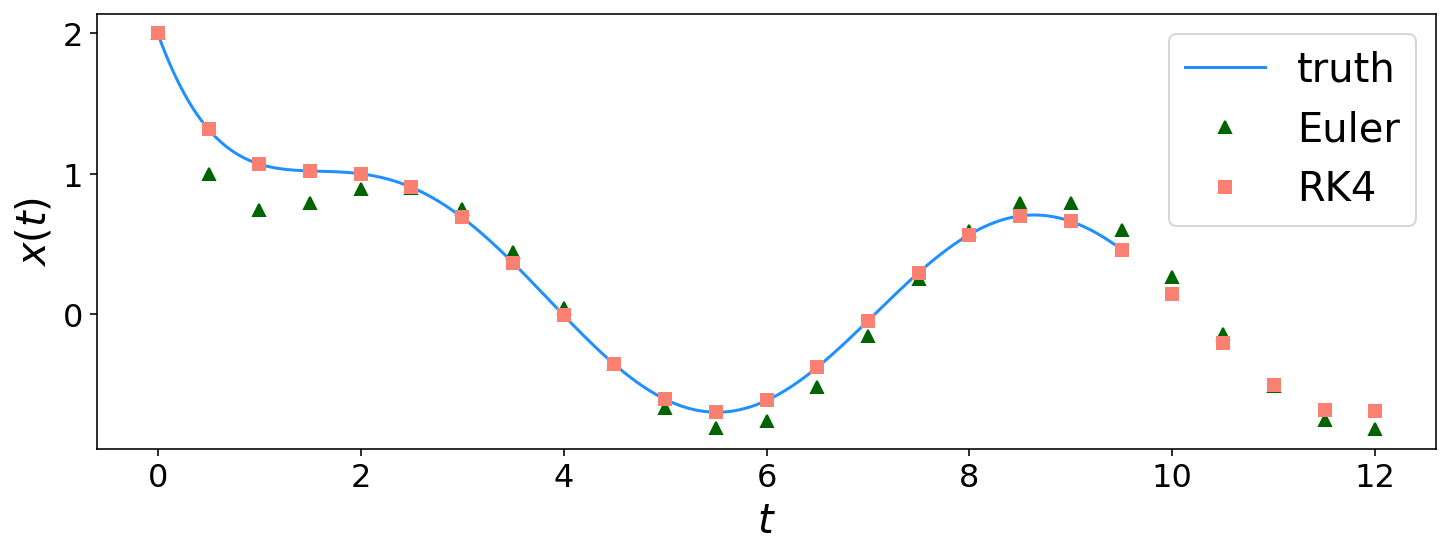

In [101]:
x_rk4 = 0*t; x_rk4[0] = x0 #initialize array and set initial condition

for j in np.arange(0, nsteps-1):
    xn, tn = x_rk4[j], t[j] 
    x_rk4[j+1] = RK4(xn, tn, dt)    

plt.figure(figsize=(12, 4))
plt.plot(t_an, x_an, label="truth", color="dodgerblue")
plt.plot(t, x_euler, '^', label="Euler", color="darkgreen")
plt.plot(t, x_rk4, 's', label="RK4", color="salmon")
plt.legend(fontsize=20); plt.xlabel(r"$t$"); plt.ylabel(r"$x(t)$");

## What about a 2-dimensional system

Consider the following:   

\begin{align}
\dot{x} &= y,\\
\dot{y} &= -x,
\end{align}

with $x(0)=x_0$, $y(0)=y_0$.

(What's do these equations describe?)

In [107]:
def RHS(x, t):
    xdot = np.zeros((2,))
    xdot[0] = -x[1]
    xdot[1] =  x[0]
    return xdot

## The simple harmonic oscillator

The solution is
\begin{align}
 x(t) &= x_0 \cos t + y_0 \sin t,\\
 y(t) &= -x_0 \sin t + y_0 \cos t.
\end{align}

In [108]:
x0 = np.zeros((2,))
x0[0], x0[1] = 1.0, 0.0

t_an = np.linspace(0, tfin, 10001) 
x_an = np.zeros((2, len(t_an)))
x_an[0, :], x_an[1, :] = cos(t_an), -sin(t_an)

tfin, nsteps = 3*pi, 50  # final time, number of time-steps
t = np.linspace(0, tfin, nsteps); dt = t[1]-t[0]

x_euler = np.zeros((2, len(t))); x_euler[:, 0] = x0
x_rk4 = np.zeros((2, len(t))); x_rk4[:, 0] = x0

for j in np.arange(0, nsteps-1):
    xn, tn = x_euler[:, j], t[j] 
    x_euler[:, j+1] = Euler(xn, tn, dt)
    xn, tn = x_rk4[:, j], t[j] 
    x_rk4[:, j+1] = RK4(xn, tn, dt)    

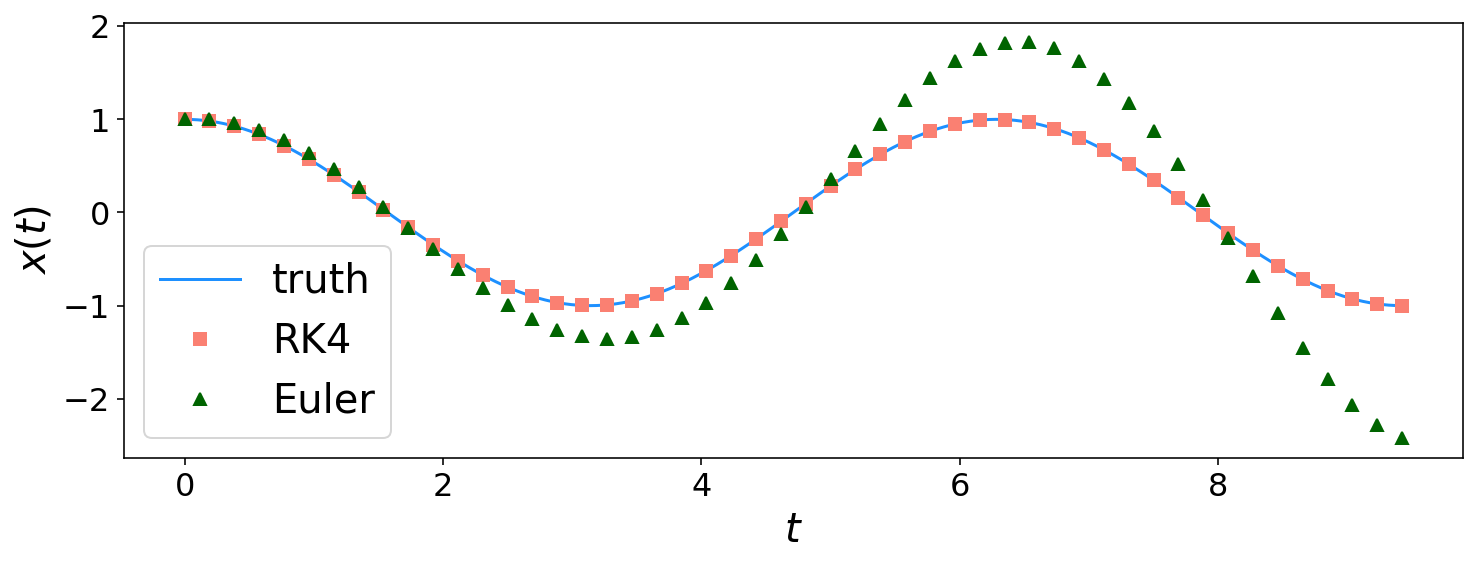

In [109]:
plt.figure(figsize=(12, 4))
plt.plot(t_an, x_analytic[0, :], label="truth", color="dodgerblue")
plt.plot(t, x_rk4[0, :], 's', label="RK4", color="salmon")
plt.plot(t, x_euler[0, :], '^', label="Euler", color="darkgreen")
plt.legend(fontsize=20)
plt.xlabel(r"$t$"); plt.ylabel(r"$x(t)$");

## Let's plot it in phase space $x$-$\dot{x}$

What do you expect to see?

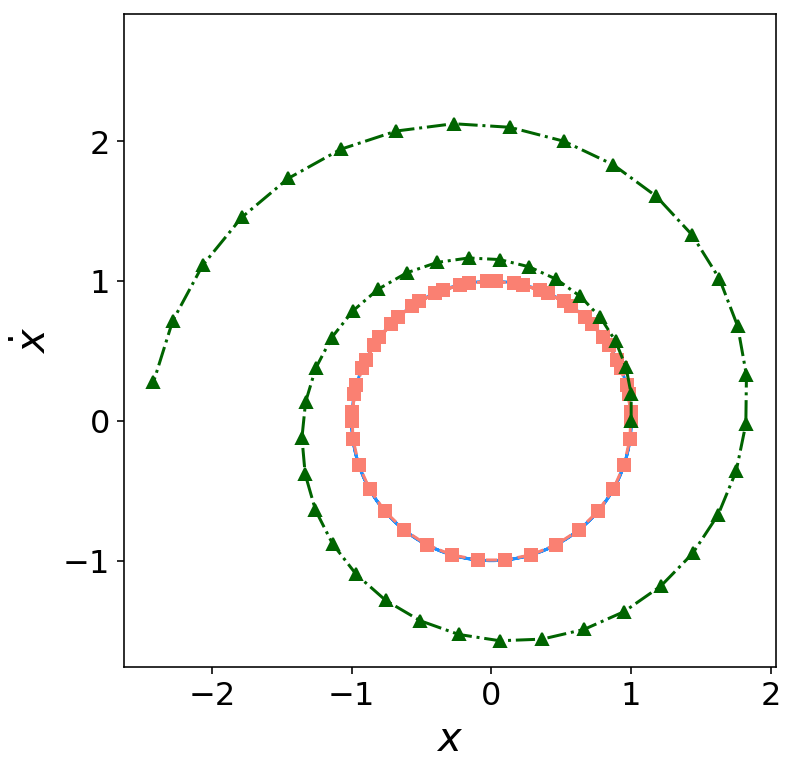

In [112]:
plt.figure(figsize=(6, 6))
x, xdot = x_analytic[0, :], x_analytic[1, :]
plt.plot(x, xdot, label="truth", color="dodgerblue")
x, xdot = x_rk4[0, :], x_rk4[1, :]
plt.plot(x, xdot, "s--", label="RK4", color="salmon")
x, xdot = x_euler[0, :], x_euler[1, :]
plt.plot(x, xdot, "^-.", label="Euler", color="darkgreen")
plt.xlabel(r"$x$"); plt.ylabel(r"$\dot{x}$");
plt.axis('square');

#### Exercise 3 
Why Euler method spirals out?

#### Exercise 4 
Consider the damped harmonic oscillator:
$$
  \ddot{x} + 2\gamma \dot{x} + x = 0,\;\; x(0)=x_0,\;\; \dot{x}(0)=v_0.
$$

Take $\gamma=0.1$ and use numerical parameters as above `tfin=3pi` and `nsteps=50`. Integrate using Euler and RK4. What do you conclude about the stability character of the fixed point $x=\dot{x}=0$ **just** from the results of numerical integrations?